In [7]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def fsyst(x, p, t):
    f = np.empty((2,))
    phi = p['phi0'] + p['rate'] * t 
    f[0] = p['a1']*x[0]**3 + p['a2']*x[0] + phi 
    f[1] = p['b1']*x[1]**3 + p['b2']*x[1] + p['c']*x[0]
    return f
def f(t,X):
    return fsyst(X,p,t)

Text(0, 0.5, '$x,y$')

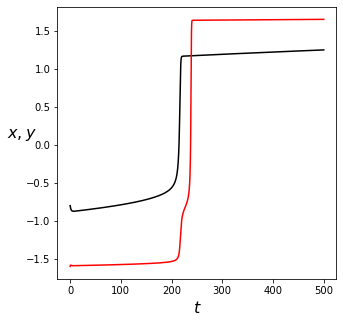

In [17]:
p={}

p['a1']= -0.5
p['b1']= -0.5
p['a2'] = 0.5
p['b2'] =  1.0
p['c'] = 0.48
p['phi0'] = 0.1 
p['rate'] = 0.0005

p['dt']=0.1
p['Ttime'] = 500.
p['steps']= int(p['Ttime']//p['dt'])
#Initial conditions
X_0= [-0.8,-1.6]
sol1 = solve_ivp(f,(0,p['Ttime']),X_0,method='RK45',vectorized=True,max_step=p['dt'])

plt.figure(1,figsize=(5,5))
plt.plot(sol1.t,sol1.y[0,:],'k')
plt.plot(sol1.t,sol1.y[1,:],'r')
plt.xlabel(r'$t$',fontsize=16); plt.ylabel(r'$x,y$',fontsize=16,rotation=0)